<h1> Assignment 3</h1>
<ul>
<p>General Info:</p>
<ul>
    <li> <b>Hand-In Date</b>: 21st of Nov 2020, by 23:59 </li>
    <li> <b>Hand-In Format</b>: as jupyter notebook (run once through) AND printed as PDF via e-class. The naming format shold be your studentId_Assignment3.filetype (pdf or ipynb).</li>
    <li><b>Late Hand-In Penalty</b>: -10% of your points per late-day</li>  
    </ul>
<h2><b>Topics Covered: </b></h2>
<ul>
    This assignment is about the engineering process of blackbox optimization. The idea behind this is to keep the 'spirit' of the assignment as close as possible to a real-life engineering/research task while still being gradeable and not too overwhelming content wise, as everyone is probably busy with projects and studying for exams as well. <br/>
    During this assignment, you establish several baselines and then propose and test an additional candidate solution. During A2 we followed a similar process, finishing with an algorithm performance analysis and a candidate solution recommendation. As the class has now covered a larger percentage of material, this time you have the freedom to choose and implement one candidate solution. <br/>
    The algorithms explored in this assignment are Random Search, Grid Search, Particle Swarm Optimization as benchmarks as well as one meta-heuristic algorithm of your choosing.<br/>
    To maximize the benefit gained from this assignment, we urge you to try to maximize the performance of each and every benchmark first, before attempting to beat their performance with your proposed solution. <br/>
    </ul>
    
<h2><b>Marking Table: </b></h2>
<ul>
    There is a total of 100+10 points in this assignment. <br/>
    <li> <b>Task 1, 16 points</b>: Implement and explain <b>Random Search</b> and <b>Grid Search</b> as baselines for performance. <br />
    <li> <b>Task 2, 25 points</b>: Explain, implement and tune a <b>Particle Swarm Optimization</b> method. <br/>
  <li> <b>Task 3, 25 points</b>: Nominate, explain, implement and tune a <b>meta-heuristic algorithm</b> of your choice.<br/>
  <li> <b>Task 4, 24 points</b>: Compare all 4 algorithm implementations' performance on all 3 black box problems.<br/>
  <li> <b>Bonus, 10 points</b>: Come up with, justify and implement a set of additional metrics for above comparison. Bonus points will be awarded on additional insight gained through the metrics. <br/>
  <li> <b>Task 5, 10 points</b>: Spend some time thinking about how the algorithm performance would be different if the black boxes were categorical problems, write down your thoughts. Points will be given for arguments, not opinions :-)<br/>

</ul>
    
<h2><b>Grading/Tips</b></h2>
<ul>
    <li> <b> Pseudocode: </b> <url>https://en.wikipedia.org/wiki/Pseudocode</url>. The provided pseudocode should follow the hierarchical structure of the to-be-written code <b>AFTER</b> the markdown cell has been executed. It should be detailed enough to highlight the specifics of the algorithm, but doesn't have to be at the explicit variable level. The goal here is to provide a clear reading instruction for your code. <br>
    <li> <b> Comparison how-to </b>: In engineering, a comparison implies ranking based on metrics. Metrics can be numericals (0.1 vs 100) or cathegoricals (easy vs difficult). Where possible,  non-arbitrary numericals are preferable (walltime in [ms]) are preferable to arbitrary numericals ('speediness' from [1...10]) or cathegoricals (slower ... faster). Where cathegoricals are used, it is helpful to justify why a candidate is assigned a certain metric value. If a non-arbitrary numerical metric is easily available, using a similar arbitrary metrics will not give the same amount of points (for example, execution time)!.
    <li> <b>Aiming for an appropriate value:</b> A proper comparison requires a good understanding of what a reasonably good value is. The best result of a 'tight' grid search will be appropriate for this. Maybe there is a smart way of narrowing down a good area first... <br>
    <li> <b>Testing for stability:</b> 2 of the black boxes have random components, setting a different np.random.seed() for 5 runs will be sufficient 'stability' analysis. More is always welcome, however.
        


<h2> Task 0, The 3 Black Boxes </h2>
<ul>
    <li> Make sure you can import the Blackbox_Problems.py file
    <li> In the Blackbox_Problems.py file, which is scrambled, there are three problem functions: problem_1, problem_2, problem_3.
    <li> problem_1 and problem_2 have 2 input dimensions, problem_3 has 4, as it a superposition of problem_1 and problem_2
    <li> problem_2 has randomized noise, so does problem_3.
    <li> the cell below demonstrates how to import and call the problems.


In [2]:
from Blackbox_Problems_fixed import problem_1, problem_2, problem_3

# all three problems have 2 input dimensions
# the problems can be queried in tensors, matrices, vectors and single queries.
# internally, numpy does a lot of broadcasting, so querying with different dimensionalities is possible.
# but for safety reasons I would recommend making sure the two inputs have the same shape.
import numpy as np
# single values
x_one = np.array(1.0)
y_one = np.array(3.0)
z_one = problem_1(x_one, y_one)
print('Queried with two single values, returns a value of ', z_one, ' ,shape: ', z_one.shape)

# arrays, for populations maybe
x_arr = np.linspace(1,9, 20)
y_arr = np.linspace(1,9, 20)
np.random.seed(5)
z_arr = problem_2(x_arr, y_arr)
#print(x_arr)
#print(y_arr)
print(z_arr)
print('Queried with two arrays of shape', x_arr.shape, y_arr.shape, 'it returns an array of shape:', z_arr.shape)

# matrices ... like ... in a grid maybe
steps = 20
x = 0.01*np.arange(-steps/2, steps/2)
y = 0.01*np.arange(-steps/2, steps/2)
X, Y = np.meshgrid(x, y)
#print(X)
#print(Y)
Z = problem_3(X, Y, X, Y)
print(Z[0][1])
print('Queried with 4 matrices of shape', X.shape, Y.shape, 'it returns a matrix of shape:', Z.shape)

Queried with two single values, returns a value of  27.78088786085412  ,shape:  ()
[-137.06403748 -134.42110037 -118.23413422 -121.83598447 -110.95016899
 -102.40780929 -106.6909292  -102.13155316  -94.04437592  -91.10614416
  -86.17323781  -83.10474222  -77.53278979  -71.16597439  -72.37523285
  -65.39163203  -57.51447679  -50.07238903  -56.55909159  -45.30966929]
Queried with two arrays of shape (20,) (20,) it returns an array of shape: (20,)
-69.5718932059707
Queried with 4 matrices of shape (20, 20) (20, 20) it returns a matrix of shape: (20, 20)


<h2> Task 1, Benchmarks (16): </h2>
<ul>
    <li> <b>Task 1a - Random Search (4+4):</b> <br>
        <ul>
            <li> <b> Explain Random Search (4) </b>. Include the general search mechanism, hyperparameters, termination criteria, general advantages and disadvantages. <br>
            <li><b>Implement a Random search (4)</b>. The implemented method should be applicable to all 3 black boxes, optimally as callable function to prevent unnecessary C&P of code. <br>
            </ul>
    <li><b>Task 1b - Grid Search (4+4):</b> <br>
                <ul>
            <li> <b> Explain Grid Search (4) </b>. Include the general search mechanism, hyperparameters, termination criteria, general advantages and disadvantages. <br>
            <li><b>Implement a Grid Search (4)</b>. The implemented method should be applicable to all 3 black boxes, optimally as callable function to prevent unnecessary C&P of code. <br>
            </ul>



*Random search explanation here (brief)*

1.0


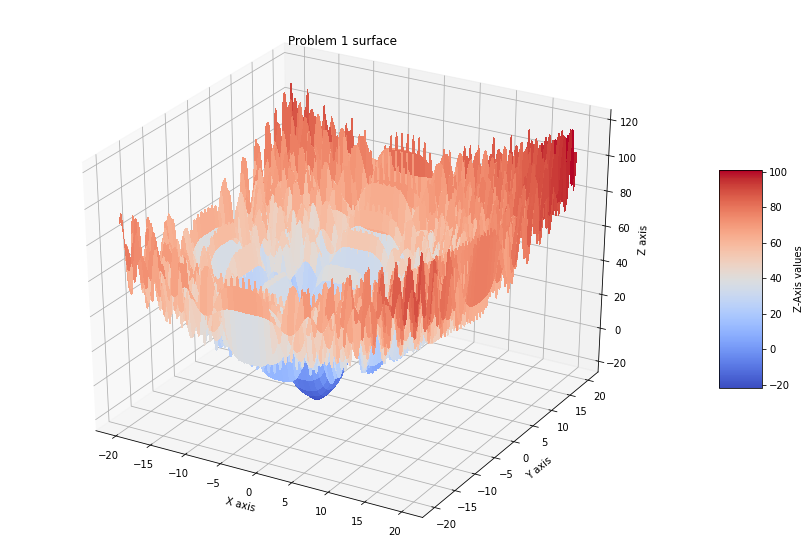

[-116.45223623 -126.97181098 -115.81630655 -123.21664797 -123.71556144]


In [50]:
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Random Search code here
test = np.array(1.0)
print(test)

x = np.arange(-20, 20, 0.1)#返回一个有起点和终点的list 步长为1
y = np.arange(-20, 20, 0.1)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(15,10))

#result = []

len_x = x.shape[0]#
len_y = y.shape[0]
z = np.zeros([len_x, len_y])
for _x in range(len_x):
    for _y in range(len_y):
        z[_x, _y] = problem_1(x[_x],y[_y])

ax1 = fig.add_subplot(111, projection='3d')#411 4行数 1列数 1子图的索引
surf1 = ax1.plot_surface(X, Y, z,
                       cmap=cm.coolwarm,#颜色映射
                       linewidth=0,     # 线宽
                       antialiased=False)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.set_title('Problem 1 surface')
fig.colorbar(surf1, shrink=0.4, aspect=5, label='Z-Axis values')

plt.show()
#print(x)


a = np.array([2,2,2,2,2])
b = np.array([2,2,2,2,2])
np.random.seed(5)
c = problem_2(a,b)
print(c)



*Grid search explanation here (brief)*

In [3]:
# Grid Search code here

<h2> Task 2, Particle Swarm Optimization (25): </h2>
<ul>
    
<li><b>Task 2a - Explanation and a priori assessment (12)</b>:<br/>
        <ul>
            <li> <b> Explain Particle Swarm Optimization (6) </b>. Include the general search mechanism, hyperparameters, termination criteria, general advantages and disadvantages. <br>
            <li> <b> Particle Swarm Optimization Pseudocode (4) </b>. Construct pseudocode for the method you are about to implement. The pseudocode can be also used to enhance the algorithm explanation. <br>
            <li> <b>Pre-assessment (2)</b>.Provide an a priori assessment of the expected performance of PSO compared to the other 3 methods. <br>
            <li> <b>(0)</b> What modifications to the deafult algorithm were made to increase performance (if any)? <br> 
            
   </ul>

<li><b>Task 2b - Implementation (13):</b> <br>
    Implement your Particle Swarm Optimization in python in the cell below. <br>

</ul>

*placeholder for explanations and a priori assessments of PSO*

In [4]:
# placeholder for PSO code

<h2> Task 3, Your Nominated Algorithm (25): </h2>
<ul>
    
<li><b>Task 3a - Explanation and a priori assessment (12)</b>:<br/>
        <ul>
            <li> <b> Explain Your Nominated Algorithm (6) </b>. Include the general search mechanism, hyperparameters, termination criteria, general advantages and disadvantages. <br>
            <li> <b> Your Nominated Algorithm Pseudocode (4) </b>. Construct pseudocode for the method you are about to implement. The pseudocode can be also used to enhance the algorithm explanation. <br>
            <li> <b>Pre-assessment (2)</b>.Provide an a priori assessment of the expected performance of Your Nominated Algorithm compared to the other 3 methods. <br>
            <li> <b>(0)</b> Why did you choose this algorithm?  <br>
            <li> <b>(0)</b> What modifications to the deafult algorithm were made to increase performance (if any)?<br> 
            
   </ul>

<li><b>Task 3b - Implementation (13):</b> <br>
    Implement your Your Nominated Algorithm in python in the cell below. <br>

</ul>

*placeholder for explanations and a priori assessments of your nominated algorithm*

In [5]:
# placeholder for your nominated algorithm code


#### <h2> Task 4, Comparison (24 + 10): </h2>
<ul>
    <li><b>Task 4a - Execute (4*2):</b><br/> Run all four tuned algorithms on several (5 or more) seeds of the problems. <br>
    <li><b>Task 4b - Compare (16):</b><br/> Compare the algorithms performance in terms of runtime (4), number of iterations (4), convergence stability (4), necessary amount of a-priori knowledge (4) and and other factors that you consider important (See Bonus). <br>
    <li><b>Task 4c - Bonus - Better Metrics (10):</b><br/> Justify and implement a set of additional metrics. These metrics should allow more in-depth algorithm performance analysis. We invite creativity, there is a lot of different aspects that optimization algorithms can be compared under! <br>


</ul>

In [6]:
# placeholder for the algorithm calls, time measurments, etc...

*placeholder for your comparison study's findings*

<h2> Task 5 – Gedankenexperiment (10): </h2>
<ul>
    <li> <b>(5)</b>: If the provided problems were of a categorical nature, for example the TSP from assignment 2, how would that have impacted your own algorithm choice and why? <br>
    <li> <b>(5)</b> How do you think the other 3 algorithms would have performed on a such a problem. What different hyper-parameter choices and algorithm modifications would have been necessary? Points will be given for arguments, not opinions :-) <br>
</ul>

*Gedankenexperiment here*